# MScFE 690 Capstone Group 7121

In [17]:
%%capture
!pip install yfinance

In [25]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=cb3b24bdf79be925e0111741d7da7bf9052081b6d8aec6ea6caf59697f5422e4
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
import os

#Problem Statement


The team will respond to the problem statement by examining the ideal situation, reality, and the gap between the two considering swing trading models for the Indian stock market.  
Ideally traders and investors in the Indian stock market should  have access to credible, statistical swing trading models that are specially designed to take advantage of the unique features associated with the NIFTY50 and NIFTYNEXT50 indices. But the reality is most traders rely on broad tactics, existing models lack the inclusion of proper back testing and technical indicators. As there is no mental preparation understanding the behavioural biases panic sets in resulting in degraded outcomes and losses.  

This project will attempt to develop a swing trading model using an array of technical indicators, fundamental research, and strong risk management techniques to reliably find profitable trading opportunities. Considering they would have undergone extensive back-testing and validation, traders would be able to trust that they would perform well in a variety of market scenarios.


In [26]:
#Import the required libraries
#%%capture
import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
import pandas as pd
import numpy as np

from ta import add_all_ta_features


In [34]:
# NIFTY 50
nifty_50_link = 'https://en.wikipedia.org/wiki/NIFTY_50'
nifty_50_df = pd.read_html(nifty_50_link)[1]

NIFTY_50_TICKER_yfinance = nifty_50_df['Symbol']+'.NS'
NIFTY_50_TICKER_yfinance = NIFTY_50_TICKER_yfinance.to_list()

# NIFTY NEXT 50
nifty_next_50_link = 'https://en.wikipedia.org/wiki/NIFTY_Next_50'
nifty_next_50_df = pd.read_html(nifty_next_50_link)[2]

NIFTY_NEXT_50_TICKER_yfinance = nifty_next_50_df['Symbol']+'.NS'
NIFTY_NEXT_50_TICKER_yfinance = NIFTY_NEXT_50_TICKER_yfinance.to_list()

The security name and symbol of MCDOWELL-N (United Spirits Limited) is changed to ***UNITDSPR*** (United Spirits Limited) with effect from June 07, 2024. Information Source

Data has been downloaded separately for ***UNITDSPR.NS***. Yahoo Finance does not have data for this particular stock beyond May 30, 2024. The data for United Spirits Limited was cleaned and saved as a csv file. It can be loaded using pandas dataframe.

In [35]:
for i, n in enumerate(NIFTY_NEXT_50_TICKER_yfinance):
    if n == 'MCDOWELL-N.NS':
        NIFTY_NEXT_50_TICKER_yfinance[i] = 'UNITDSPR.NS'

NIFTY_NEXT_50_TICKER_yfinance.remove('UNITDSPR.NS')
filename="/content/drive/MyDrive/NIFTY50/UNITDSPR.NS_2014-01-01_to_2024-09-19.csv"
united_spirits_data = pd.read_csv(filename)
united_spirits_data.set_index('Date', inplace=True)
united_spirits_data

,Open,High,Low,Close,Volume
Date,,,,,
2014-01-01,2621.6,2633.95,2596.00,2608.05,307223
2014-01-02,2604.7,2668.75,2601.00,2613.30,664020
2014-01-03,2619.9,2709.00,2608.00,2699.65,722702
2014-01-06,2710.0,2755.00,2706.75,2725.80,528027
2014-01-07,2727.9,2739.95,2666.00,2712.05,462393
...,...,...,...,...,...
2024-09-13,1529.2,1543.00,1515.60,1523.35,551554
2024-09-16,1533.9,1552.90,1525.40,1547.25,516123
2024-09-17,1547.0,1559.25,1540.80,1555.75,1224149


In [36]:
all_stock_tickers = NIFTY_50_TICKER_yfinance + NIFTY_NEXT_50_TICKER_yfinance

In [37]:
def get_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]
    data['Ticker'] = ticker
    return data

def add_technical_indicators(df):
    df = add_all_ta_features(
        df, open="Open", high="High", low="Low", close="Close", volume="Volume"
    )
    return df

# Create a list to store DataFrames
all_data = []

for ticker in all_stock_tickers:
    df = get_stock_data(ticker, '2014-01-01', '2024-09-20')
    print(f'Data on stock {ticker} has been downloaded.')
    df = add_technical_indicators(df)
    print(f'Technical indicators added to stock {ticker}.')
    all_data.append(df)

# Make appropriate changes for UNITDSPR.NS
united_spirits_data['Ticker'] = 'UNITDSPR.NS'
united_spirits_data = add_technical_indicators(united_spirits_data)
all_data.append(united_spirits_data)
print('All historical data appended.')

[*********************100%***********************]  1 of 1 completed


Data on stock ADANIENT.NS has been downloaded.
Technical indicators added to stock ADANIENT.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock ADANIPORTS.NS has been downloaded.
Technical indicators added to stock ADANIPORTS.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock APOLLOHOSP.NS has been downloaded.
Technical indicators added to stock APOLLOHOSP.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock ASIANPAINT.NS has been downloaded.
Technical indicators added to stock ASIANPAINT.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock AXISBANK.NS has been downloaded.


[*********************100%***********************]  1 of 1 completed

Technical indicators added to stock AXISBANK.NS.
Data on stock BAJAJ-AUTO.NS has been downloaded.


Technical indicators added to stock BAJAJ-AUTO.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock BAJFINANCE.NS has been downloaded.
Technical indicators added to stock BAJFINANCE.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock BAJAJFINSV.NS has been downloaded.
Technical indicators added to stock BAJAJFINSV.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock BEL.NS has been downloaded.
Technical indicators added to stock BEL.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock BPCL.NS has been downloaded.


[*********************100%***********************]  1 of 1 completed

Technical indicators added to stock BPCL.NS.
Data on stock BHARTIARTL.NS has been downloaded.


Technical indicators added to stock BHARTIARTL.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock BRITANNIA.NS has been downloaded.


[*********************100%***********************]  1 of 1 completed

Technical indicators added to stock BRITANNIA.NS.
Data on stock CIPLA.NS has been downloaded.



[*********************100%***********************]  1 of 1 completed

Technical indicators added to stock CIPLA.NS.
Data on stock COALINDIA.NS has been downloaded.



[*********************100%***********************]  1 of 1 completed

Technical indicators added to stock COALINDIA.NS.
Data on stock DRREDDY.NS has been downloaded.


Technical indicators added to stock DRREDDY.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock EICHERMOT.NS has been downloaded.
Technical indicators added to stock EICHERMOT.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock GRASIM.NS has been downloaded.


[*********************100%***********************]  1 of 1 completed

Technical indicators added to stock GRASIM.NS.
Data on stock HCLTECH.NS has been downloaded.


Technical indicators added to stock HCLTECH.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock HDFCBANK.NS has been downloaded.
Technical indicators added to stock HDFCBANK.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock HDFCLIFE.NS has been downloaded.
Technical indicators added to stock HDFCLIFE.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock HEROMOTOCO.NS has been downloaded.
Technical indicators added to stock HEROMOTOCO.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock HINDALCO.NS has been downloaded.
Technical indicators added to stock HINDALCO.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock HINDUNILVR.NS has been downloaded.
Technical indicators added to stock HINDUNILVR.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock ICICIBANK.NS has been downloaded.
Technical indicators added to stock ICICIBANK.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock INDUSINDBK.NS has been downloaded.
Technical indicators added to stock INDUSINDBK.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock INFY.NS has been downloaded.
Technical indicators added to stock INFY.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock ITC.NS has been downloaded.
Technical indicators added to stock ITC.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock JSWSTEEL.NS has been downloaded.
Technical indicators added to stock JSWSTEEL.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock KOTAKBANK.NS has been downloaded.


[*********************100%***********************]  1 of 1 completed

Technical indicators added to stock KOTAKBANK.NS.
Data on stock LT.NS has been downloaded.


Technical indicators added to stock LT.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock M&M.NS has been downloaded.
Technical indicators added to stock M&M.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock MARUTI.NS has been downloaded.
Technical indicators added to stock MARUTI.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock NESTLEIND.NS has been downloaded.
Technical indicators added to stock NESTLEIND.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock NTPC.NS has been downloaded.
Technical indicators added to stock NTPC.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock ONGC.NS has been downloaded.
Technical indicators added to stock ONGC.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock POWERGRID.NS has been downloaded.
Technical indicators added to stock POWERGRID.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock RELIANCE.NS has been downloaded.


[*********************100%***********************]  1 of 1 completed

Technical indicators added to stock RELIANCE.NS.
Data on stock SBILIFE.NS has been downloaded.



[*********************100%***********************]  1 of 1 completed

Technical indicators added to stock SBILIFE.NS.
Data on stock SHRIRAMFIN.NS has been downloaded.


Technical indicators added to stock SHRIRAMFIN.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock SBIN.NS has been downloaded.
Technical indicators added to stock SBIN.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock SUNPHARMA.NS has been downloaded.


[*********************100%***********************]  1 of 1 completed

Technical indicators added to stock SUNPHARMA.NS.


Data on stock TCS.NS has been downloaded.
Technical indicators added to stock TCS.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock TATACONSUM.NS has been downloaded.
Technical indicators added to stock TATACONSUM.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock TATAMOTORS.NS has been downloaded.
Technical indicators added to stock TATAMOTORS.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock TATASTEEL.NS has been downloaded.


[*********************100%***********************]  1 of 1 completed

Technical indicators added to stock TATASTEEL.NS.
Data on stock TECHM.NS has been downloaded.



[*********************100%***********************]  1 of 1 completed

Technical indicators added to stock TECHM.NS.
Data on stock TITAN.NS has been downloaded.


Technical indicators added to stock TITAN.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock TRENT.NS has been downloaded.


[*********************100%***********************]  1 of 1 completed

Technical indicators added to stock TRENT.NS.
Data on stock ULTRACEMCO.NS has been downloaded.


Technical indicators added to stock ULTRACEMCO.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock WIPRO.NS has been downloaded.


[*********************100%***********************]  1 of 1 completed

Technical indicators added to stock WIPRO.NS.
Data on stock ABB.NS has been downloaded.



[*********************100%***********************]  1 of 1 completed

Technical indicators added to stock ABB.NS.
Data on stock ADANIENSOL.NS has been downloaded.



[*********************100%***********************]  1 of 1 completed

Technical indicators added to stock ADANIENSOL.NS.
Data on stock ADANIGREEN.NS has been downloaded.



[*********************100%***********************]  1 of 1 completed

Technical indicators added to stock ADANIGREEN.NS.
Data on stock ADANIPOWER.NS has been downloaded.



[*********************100%***********************]  1 of 1 completed

Technical indicators added to stock ADANIPOWER.NS.
Data on stock ATGL.NS has been downloaded.


Technical indicators added to stock ATGL.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock AMBUJACEM.NS has been downloaded.
Technical indicators added to stock AMBUJACEM.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock BAJAJHLDNG.NS has been downloaded.
Technical indicators added to stock BAJAJHLDNG.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock BANKBARODA.NS has been downloaded.
Technical indicators added to stock BANKBARODA.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock BHEL.NS has been downloaded.
Technical indicators added to stock BHEL.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock BOSCHLTD.NS has been downloaded.
Technical indicators added to stock BOSCHLTD.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock CANBK.NS has been downloaded.


[*********************100%***********************]  1 of 1 completed

Technical indicators added to stock CANBK.NS.


Data on stock CHOLAFIN.NS has been downloaded.
Technical indicators added to stock CHOLAFIN.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock DABUR.NS has been downloaded.
Technical indicators added to stock DABUR.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock DIVISLAB.NS has been downloaded.


[*********************100%***********************]  1 of 1 completed

Technical indicators added to stock DIVISLAB.NS.
Data on stock DLF.NS has been downloaded.



[*********************100%***********************]  1 of 1 completed

Technical indicators added to stock DLF.NS.
Data on stock DMART.NS has been downloaded.


Technical indicators added to stock DMART.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock GAIL.NS has been downloaded.
Technical indicators added to stock GAIL.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock GODREJCP.NS has been downloaded.
Technical indicators added to stock GODREJCP.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock HAVELLS.NS has been downloaded.


[*********************100%***********************]  1 of 1 completed

Technical indicators added to stock HAVELLS.NS.
Data on stock HAL.NS has been downloaded.



[*********************100%***********************]  1 of 1 completed

Technical indicators added to stock HAL.NS.
Data on stock ICICIGI.NS has been downloaded.



[*********************100%***********************]  1 of 1 completed

Technical indicators added to stock ICICIGI.NS.
Data on stock ICICIPRULI.NS has been downloaded.


Technical indicators added to stock ICICIPRULI.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock IOC.NS has been downloaded.


[*********************100%***********************]  1 of 1 completed

Technical indicators added to stock IOC.NS.
Data on stock INDIGO.NS has been downloaded.



[*********************100%***********************]  1 of 1 completed

Technical indicators added to stock INDIGO.NS.
Data on stock NAUKRI.NS has been downloaded.



[*********************100%***********************]  1 of 1 completed

Technical indicators added to stock NAUKRI.NS.
Data on stock IRCTC.NS has been downloaded.



[*********************100%***********************]  1 of 1 completed

Technical indicators added to stock IRCTC.NS.
Data on stock IRFC.NS has been downloaded.


Technical indicators added to stock IRFC.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock JINDALSTEL.NS has been downloaded.


[*********************100%***********************]  1 of 1 completed

Technical indicators added to stock JINDALSTEL.NS.
Data on stock JIOFIN.NS has been downloaded.



[*********************100%***********************]  1 of 1 completed

Technical indicators added to stock JIOFIN.NS.
Data on stock JSWENERGY.NS has been downloaded.



[*********************100%***********************]  1 of 1 completed

Technical indicators added to stock JSWENERGY.NS.
Data on stock LICI.NS has been downloaded.



[*********************100%***********************]  1 of 1 completed

Technical indicators added to stock LICI.NS.
Data on stock LODHA.NS has been downloaded.



[*********************100%***********************]  1 of 1 completed

Technical indicators added to stock LODHA.NS.
Data on stock LTIM.NS has been downloaded.



[*********************100%***********************]  1 of 1 completed

Technical indicators added to stock LTIM.NS.
Data on stock NHPC.NS has been downloaded.



[*********************100%***********************]  1 of 1 completed

Technical indicators added to stock NHPC.NS.


Data on stock PIDILITIND.NS has been downloaded.
Technical indicators added to stock PIDILITIND.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock PFC.NS has been downloaded.
Technical indicators added to stock PFC.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock PNB.NS has been downloaded.


[*********************100%***********************]  1 of 1 completed

Technical indicators added to stock PNB.NS.
Data on stock RECLTD.NS has been downloaded.



[*********************100%***********************]  1 of 1 completed

Technical indicators added to stock RECLTD.NS.
Data on stock MOTHERSON.NS has been downloaded.



[*********************100%***********************]  1 of 1 completed

Technical indicators added to stock MOTHERSON.NS.
Data on stock SHREECEM.NS has been downloaded.



[*********************100%***********************]  1 of 1 completed

Technical indicators added to stock SHREECEM.NS.
Data on stock SIEMENS.NS has been downloaded.



[*********************100%***********************]  1 of 1 completed

Technical indicators added to stock SIEMENS.NS.
Data on stock TATAPOWER.NS has been downloaded.


Technical indicators added to stock TATAPOWER.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock TORNTPHARM.NS has been downloaded.


[*********************100%***********************]  1 of 1 completed

Technical indicators added to stock TORNTPHARM.NS.


Data on stock TVSMOTOR.NS has been downloaded.


[*********************100%***********************]  1 of 1 completed

Technical indicators added to stock TVSMOTOR.NS.
Data on stock UNIONBANK.NS has been downloaded.



[*********************100%***********************]  1 of 1 completed

Technical indicators added to stock UNIONBANK.NS.
Data on stock VBL.NS has been downloaded.


Technical indicators added to stock VBL.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock VEDL.NS has been downloaded.


[*********************100%***********************]  1 of 1 completed

Technical indicators added to stock VEDL.NS.
Data on stock ZOMATO.NS has been downloaded.


Technical indicators added to stock ZOMATO.NS.


[*********************100%***********************]  1 of 1 completed


Data on stock ZYDUSLIFE.NS has been downloaded.
Technical indicators added to stock ZYDUSLIFE.NS.
All historical data appended.


The **Coiled Spring Strategy** is a popular approach in swing trading that typically looks for stocks where the price consolidates in a tight range for some time and is expected to "spring" out of that range, either upwards or downwards. It's generally identified using indicators such as **Bollinger Bands** to gauge volatility compression.

Implement the strategy using Bollinger Bands to detect when the price has been in a tight range, anticipating a breakout.

### Steps:
1. **Read the historical OHLC data from a file.**
2. **Calculate the Bollinger Bands** to identify price consolidation.
3. **Set up buy/sell signals** based on the coiled spring strategy.
4. **Buy** when the price breaks out of the upper Bollinger Band.
5. **Sell** when the price breaks below the lower Bollinger Band or a defined stop loss.

### Requirements:
- **pandas**: To handle OHLC data.
- **TA-Lib**: To calculate Bollinger Bands.
- **matplotlib**: To visualize the data.


### Explanation of the Code:

1. **Reading OHLC Data**:
   - The `read_data` function reads a CSV file with columns: `Date`, `Open`, `High`, `Low`, and `Close`.

2. **Bollinger Bands**:
   - `calculate_bollinger_bands` computes the upper, middle, and lower bands based on a 20-day moving average and 2 standard deviations by default.

3. **Coiled Spring Strategy**:
   - `coiled_spring_strategy` identifies buy and sell signals:
     - **Buy** when the price closes above the upper Bollinger Band (anticipating an upward breakout).
     - **Sell** when the price closes below the lower Bollinger Band (anticipating a downward breakout).

4. **Visualization**:
   - The results are plotted using `matplotlib`, showing the Close prices and Bollinger Bands. Buy signals are marked with green arrows (`^`), and sell signals are marked with red arrows (`v`).

### Usage:

1. Using filecontaining historical stock data for Tata Steel and United Spirits
2. The scrip calculates the Bollinger Bands, identifies buy and sell signals, and plots the data with signals.

### Still to do
- incorporte MACD and RSI
- back test with minimum 2 years worth data

In [4]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xvzf ta-lib-0.4.0-src.tar.gz
!cd ta-lib && ./configure --prefix=/usr && make && make install


--2024-09-29 01:35:23--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-09-29 01:35:23--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://gigenet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1 [following]
--2024-09-29 01:35:23--  http://gigenet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1
Resolving

In [5]:
!pip install ta-Lib

  Using cached TA-Lib-0.4.32.tar.gz (368 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ta-Lib: filename=TA_Lib-0.4.32-cp310-cp310-linux_x86_64.whl size=2063343 sha256=f82a549ab4121b6f162e8fb9917cc95acce5019c003c4ecfb084d6b78c6843c6
  Stored in directory: /root/.cache/pip/wheels/c3/21/bd/ca95eb09997c2a18fce271b98b10ffa9fcafbaa161be864dd7
Successfully built ta-Lib


In [6]:
#Install the required libraries:
!pip install pandas  matplotlib

In [11]:
import pandas as pd
import talib
import matplotlib.pyplot as plt

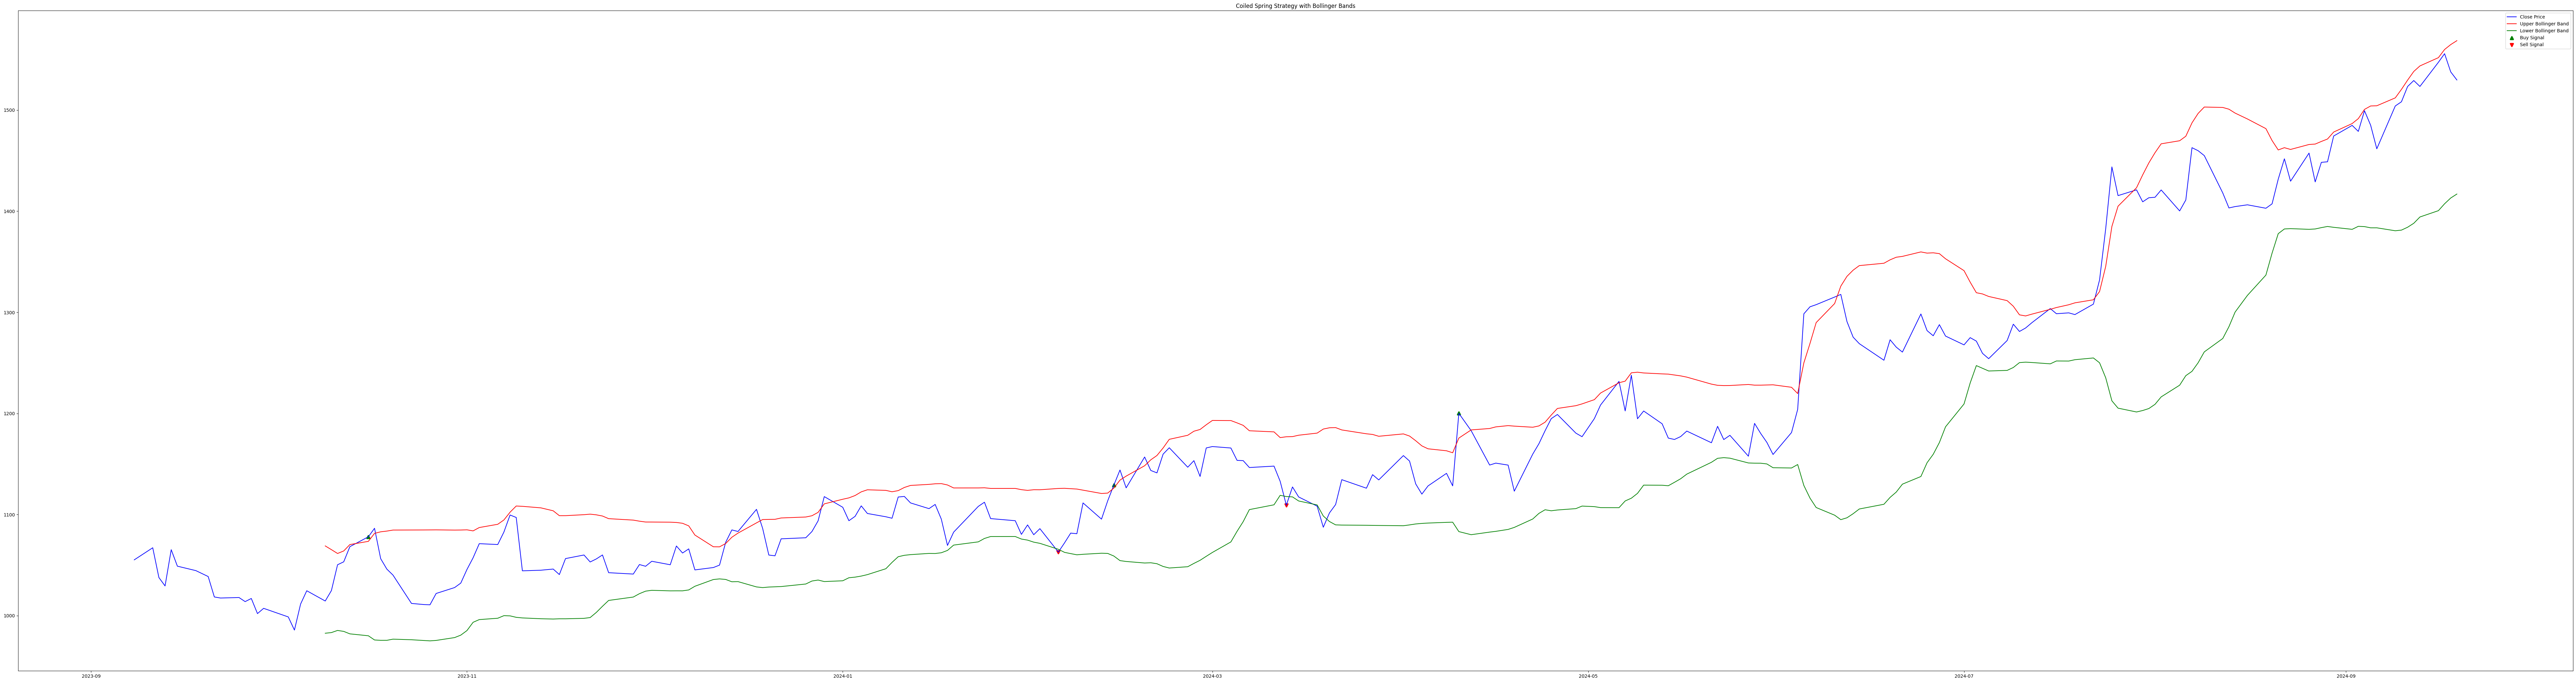

In [55]:
# 1. Read OHLC data from a CSV file (Using the TATA Steel File downloaded
# earlier for year 2023) Ensure your CSV file has 'Date', 'Open', 'High', 'Low',
# 'Close' columns
def read_data(file_path):
    data = pd.read_csv(file_path, parse_dates=['Date'])
    data.set_index('Date', inplace=True)
    return data

# 2. Calculate Bollinger Bands
def calculate_bollinger_bands(data, window=20, num_std_dev=2):
    upper_band, middle_band, lower_band = talib.BBANDS(data['Close'], timeperiod=window, nbdevup=num_std_dev, nbdevdn=num_std_dev, matype=0)
    data['Upper_Band'] = upper_band
    data['Middle_Band'] = middle_band
    data['Lower_Band'] = lower_band

# 3. Implement Coiled Spring Strategy
def coiled_spring_strategy(data):
    buy_signals = []
    sell_signals = []
    position = None  # Track whether you are in a buy or sell position

    for i in range(1, len(data)):
        # If price breaks above the upper Bollinger Band, buy
        if data['Close'][i] > data['Upper_Band'][i] and position != 'buy':
            buy_signals.append(data.index[i])
            position = 'buy'

        # If price breaks below the lower Bollinger Band, sell (or sell if a stop loss is triggered)
        elif data['Close'][i] < data['Lower_Band'][i] and position == 'buy':
            sell_signals.append(data.index[i])
            position = 'sell'

    return buy_signals, sell_signals

# 4. Visualize the results
def plot_strategy(data, buy_signals, sell_signals):
    plt.figure(figsize=(100, 26))
    plt.plot(data.index, data['Close'], label='Close Price', color='blue')
    plt.plot(data.index, data['Upper_Band'], label='Upper Bollinger Band', color='red')
    plt.plot(data.index, data['Lower_Band'], label='Lower Bollinger Band', color='green')

    # Plot buy signals
    plt.scatter(buy_signals, data.loc[buy_signals]['Close'], label='Buy Signal', marker='^', color='green', lw=3)

    # Plot sell signals
    plt.scatter(sell_signals, data.loc[sell_signals]['Close'], label='Sell Signal', marker='v', color='red', lw=3)

    plt.title('Coiled Spring Strategy with Bollinger Bands')
    plt.legend(loc='best')
    plt.show()

# Main function to execute the strategy
if __name__ == "__main__":
    #filename = "/content/drive/MyDrive/NIFTY50/TATASTEEL.NS_ohlc_data.csv"
    filename = "/content/drive/MyDrive/NIFTY50/UNITDSPR.NS_2014-01-01_to_2024-09-19.csv"
    # Example CSV file: Replace 'historical_data.csv' with your actual file
    data = read_data(file_path=filename)

    #Filter and keep only last 2 year of data
    data = data.iloc[-252:]

    # Calculate Bollinger Bands
    calculate_bollinger_bands(data)

    # Get Buy and Sell signals
    buy_signals, sell_signals = coiled_spring_strategy(data)

    # Plot the results
    plot_strategy(data, buy_signals, sell_signals)

